# 一维

## dp[i] = dp[i-1] + dp[i-2]

### [70. 爬楼梯](https://leetcode.cn/problems/climbing-stairs/)

假设你正在爬楼梯。需要$n$阶你才能到达楼顶。

每次你可以爬$1$或$2$个台阶。你有多少种不同的方法可以爬到楼顶呢？

In [ ]:
n = 3

dp = [0 for _ in range(n)]
dp[0] = 1
if n > 1:
    dp[1] = 2
    for ii in range(2,n):
        dp[ii] = dp[ii-1] + dp[ii-2]

print(dp[-1])

In [ ]:
#include<iostream>
#include<vector>
int n = 3;

std::vector<int> dp(n, 0);
dp[0] = 1;
if (n > 1) {
    dp[1] = 2;
    for (int ii = 2; ii < n; ii++) {
        dp[ii] = dp[ii - 1] + dp[ii - 2];
    }
}

std::cout << dp.back() << std::endl;

### todo 746. 使用最小花费爬楼梯

In [ ]:
cost = [10, 15, 20]
cost = [1, 100, 1, 1, 1, 100, 1, 1, 100, 1]
cost = [0,0,0,0]
cost = [1]
dp = [0 for ii in range(len(cost)+1)]
cost.append(0)

dp[0] = cost[0]
dp[1] = cost[1]
for ii in range(2,len(cost)):
    dp[ii] = min(dp[ii-1], dp[ii-2]) + cost[ii]
print(dp[-1])

### [剑指 Offer 46. 把数字翻译成字符串](https://leetcode.cn/problems/ba-shu-zi-fan-yi-cheng-zi-fu-chuan-lcof/)
给定一个数字，我们按照如下规则把它翻译为字符串：0 翻译成 “a” ，1 翻译成 “b”，……，11 翻译成 “l”，……，25 翻译成 “z”。一个数字可能有多个翻译。请编程实现一个函数，用来计算一个数字有多少种不同的翻译方法。

In [ ]:
num = 12258

num_str = str(num)
dp = [0 for _ in range(len(num_str))]
dp[0] = 1
if len(num_str) > 1:
    dp[1] = 1
    if int(num_str[0:2]) >= 10 and int(num_str[0:2]) <= 25:
        dp[1] += 1

    for ii in range(2,len(num_str)):
        dp[ii] = dp[ii-1]
        if int(num_str[ii-1:ii+1]) >= 10 and int(num_str[ii-1:ii+1]) <= 25:
            dp[ii] += dp[ii-2]

print(dp[-1])

In [ ]:
dict1 = {'0':'A','1':'B','2':'C','3':'D','4':'E','5':'F','6':'G','7':'H','8':'I','9':'J','10':'K','11':'L','12':'M','13':'N','14':'O','15':'P','16':'Q','17':'R','18':'S','19':'T','20':'U','21':'V','22':'W','23':'X','24':'Y','25':'Z'}
record = []
def backtrack(visited, remaining):
    if len(remaining) == 0:
        record.append(visited)
        return
    else:
        if remaining[0] in dict1:
            backtrack(visited+dict1[remaining[0]], remaining[1:])
        if len(remaining) > 1 and remaining[0:2] in dict1:
            backtrack(visited+dict1[remaining[0:2]], remaining[2:])
backtrack("", str(num))
print(record)
print(len(record))

### todo: [639. 解码方法 II](https://leetcode-cn.com/problems/decode-ways-ii/)

dp[i] 由 dp[i-1] 和 dp[i-2]) 推得
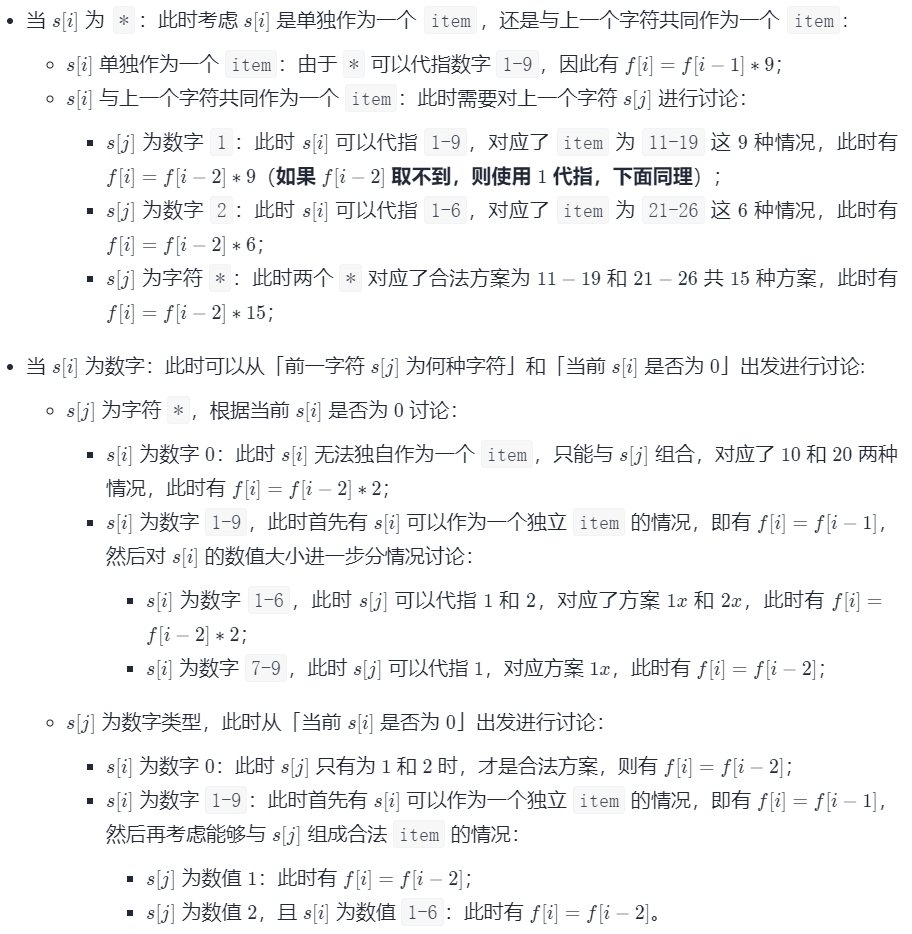

In [ ]:
s = "*10*1"

dp = [0 for _ in range(len(s))]
if s[0] == '*':
    dp[0] = 9
elif s[0] in set([str(ii) for ii in range(1,10)]):
    dp[0] = 1

for ii in range(1,len(s)):
    if s[ii] == '*':
        dp[ii] += dp[ii-1]*9
        if s[ii-1] == '1':
            if ii-2 >= 0:
                dp[ii] += dp[ii-2]*9
            else:
                dp[ii] += 9
        elif s[ii-1] == '2':
            if ii-2 >= 0:
                dp[ii] += dp[ii-2]*6
            else:
                dp[ii] += 6
        elif s[ii-1] == '*':
            if ii-2 >= 0:
                dp[ii] += dp[ii-2]*15
            else:
                dp[ii] += 15
    else:
        if s[ii-1] == '*':
            if s[ii] == '0':
                if ii-2 >= 0:
                    dp[ii] += dp[ii-2]*2
                else:
                    dp[ii] += 2
            else: #1-9
                dp[ii] += dp[ii-1]
                if s[ii] in set(['1','2','3','4','5','6']):
                    if ii-2 >= 0: 
                        dp[ii] += dp[ii-2]*2
                    else:
                        dp[ii] += 2
                elif s[ii] in set(['7','8','9']):
                    if ii-2 >= 0: 
                        dp[ii] += dp[ii-2]
                    else:
                        dp[ii] += 1
        else:
            if s[ii] == '0':
                if s[ii-1] in set(['1','2']):
                    if ii-2 >= 0: 
                        dp[ii] += dp[ii-2]
                    else:
                        dp[ii] += 1
            else: #1-9
                dp[ii] += dp[ii-1]
                if s[ii-1] == '1':
                    if ii-2 >= 0: 
                        dp[ii] += dp[ii-2]
                    else:
                        dp[ii] += 1
                elif s[ii-1] == '2' and s[ii] in set(['1','2','3','4','5','6']):
                    if ii-2 >= 0: 
                        dp[ii] += dp[ii-2]
                    else:
                        dp[ii] += 1
        
print(dp)
print( dp[-1]%(10**9+7) )

In [ ]:
#include <iostream>
#include <vector>
#include <unordered_set>
#include <string>
using namespace std;

string s = "*10*1";

unordered_set<char> set19 = {'1','2','3','4','5','6','7','8','9'};
unordered_set<char> set16 = {'1','2','3','4','5','6'};
vector<long long> dp;
for (int ii=0;ii<s.size();ii++){
    dp.emplace_back(0);
}
if (s[0] == '*'){
    dp[0] = 9;
}
else if (set19.count(s[0]) == 1){
    dp[0] = 1;
}

for (int ii=1;ii<s.size();ii++){
    if (s[ii] == '*'){
        dp[ii] += (dp[ii-1]*9)%1000000007;
        if (s[ii-1] == '1'){
            if (ii-2 >= 0){
                dp[ii] += (dp[ii-2]*9)%1000000007;
            }
            else {
                dp[ii] += 9;
            }
        }
        else if (s[ii-1] == '2') {
            if (ii-2 >= 0) {
                dp[ii] += (dp[ii-2]*6)%1000000007;
            }
            else {
                dp[ii] += 6;
            }
        }
        else if (s[ii-1] == '*'){
            if (ii-2 >= 0){
                dp[ii] += (dp[ii-2]*15)%1000000007;
            }
            else {
                dp[ii] += 15;
            }
        }
    }
    else {
        if (s[ii-1] == '*'){
            if (s[ii] == '0'){
                if (ii-2 >= 0) {
                    dp[ii] += (dp[ii-2]*2)%1000000007;
                }
                else {
                    dp[ii] += 2;
                }
            }
            else{
                dp[ii] += (dp[ii-1])%1000000007;
                if (set16.count(s[ii]) == 1) {
                    if (ii-2 >= 0) {
                        dp[ii] += (dp[ii-2]*2)%1000000007;
                    } 
                    else {
                        dp[ii] += 2;
                    }
                }
                else if (s[ii] == '7' || s[ii] == '8' || s[ii] == '9') {
                    if (ii-2 >= 0){
                        dp[ii] += (dp[ii-2])%1000000007;
                    } 
                    else {
                        dp[ii] += 1;
                    }
                }
            }
        }
        else {
            if (s[ii] == '0') {
                if (s[ii-1] == '1' || s[ii-1] == '2') {
                    if (ii-2 >= 0){
                        dp[ii] += (dp[ii-2])%1000000007;
                    } 
                    else {
                        dp[ii] += 1;
                    }
                }
            }
            else {
                dp[ii] += (dp[ii-1])%1000000007;
                if (s[ii-1] == '1') {
                    if (ii-2 >= 0) {
                        dp[ii] += (dp[ii-2])%1000000007;
                    }
                    else {
                        dp[ii] += 1;
                    }
                }

                else if (s[ii-1] == '2' && set16.count(s[ii]) == 1) {
                    if (ii-2 >= 0) {
                        dp[ii] += (dp[ii-2])%1000000007;
                    }
                    else {
                        dp[ii] += 1;
                    }
                }
            }
        }
    }
}
cout << dp.back()%1000000007 << endl;

### [53. 最大子数组和](https://leetcode.cn/problems/maximum-subarray/)
$\iff$[剑指 Offer 42. 连续子数组的最大和](https://leetcode.cn/problems/lian-xu-zi-shu-zu-de-zui-da-he-lcof/)  
给你一个整数数组$nums$，请你找出一个具有最大和的连续子数组（子数组最少包含一个元素），返回其最大和。

**子数组**是数组中的一个连续部分。

>题解:  
$dp(i)$代表以第$i$个数结尾的「连续子数组的最大和」  
转移方程: $$dp(i)=max(dp(i−1)+nums[i],\ nums[i])$$

In [ ]:
nums = [-2,1,-3,4,-1,2,1,-5,4]

dp = [0 for _ in range(len(nums))]
dp[0] = nums[0]
for ii in range(1,len(nums)):
    dp[ii] = max(dp[ii-1] + nums[ii], nums[ii])
    
print("dp:", dp)
print(max(dp))

### [198. 打家劫舍](https://leetcode.cn/problems/house-robber/)
你是一个专业的小偷，计划偷窃沿街的房屋。每间房内都藏有一定的现金，影响你偷窃的唯一制约因素就是相邻的房屋装有相互连通的防盗系统，**如果两间相邻的房屋在同一晚上被小偷闯入，系统会自动报警**。

给定一个代表每个房屋存放金额的非负整数数组，计算你**不触动警报装置的情况下**，一夜之内能够偷窃到的最高金额。

>题解:  
用$dp[i]$表示前$i$间房屋能偷窃到的最高总金额,  
状态转移方程:$$dp[i]=max(dp[i−2]+nums[i],dp[i−1])$$  
边界条件为:  
$$ \begin{cases} \begin{array}{l,l}
dp[0]=nums[0], & 只有一间房屋，则偷窃该房屋 \\
dp[1]=max(nums[0],nums[1]), & 只有两间房屋，选择其中金额较高的房屋进行偷窃 \\
\end{array} \end{cases} $$

In [1]:
nums = [1,2,3,1]

dp = [0 for ii in range(len(nums))]
dp[0] = nums[0]
if len(nums) > 1:
    dp[1] = max(nums[0], nums[1])
    for ii in range(2, len(nums)):
        dp[ii] = max(nums[ii]+dp[ii-2], dp[ii-1])

print(dp[-1])

4


### todo: 213. 打家劫舍 II

In [ ]:
# nums = [2,3,2]
# nums = [1,2,3,1]
# nums = [1,1,9,1,1,7,1]
# nums = [200,3,140,20,10]
# nums = [2,7,9,3,1]
# nums = [1,2,1,1]
# nums = [1,1,1,2]

# def function(list1):
#     dp = [0 for _ in range(len(list1))]
#     dp[0] = list1[0]
#     dp[1] = max(list1[0:2])
#     for ii in range(2,len(list1)):
#         dp[ii] = max(dp[ii-1], dp[ii-2]+list1[ii])
#     return dp[-1]

# if len(nums) > 3:
#     print(max(function(nums[0:-1]),function(nums[1:])))
# else:
#     print(max(nums))

## 有目标的

<span id='problem_377'></span>
### [377. 组合总和 Ⅳ](https://leetcode.cn/problems/combination-sum-iv/)
给你一个由**不同**整数组成的数组$nums$，和一个目标整数$target$。请你从$nums$中找出并返回总和为$target$的元素组合的个数。

**示例 1**:  

输入: $nums = [1,2,3], target = 4$  
输出: 7  
解释:   
所有可能的组合为:  
(1, 1, 1, 1)  
(1, 1, 2)  
(1, 2, 1)  
(1, 3)  
(2, 1, 1)  
(2, 2)  
(3, 1)  
请注意，顺序不同的序列被视作不同的组合。  


>题解:  
$dp[x]$表示选取的元素之和等于$x$的方案数  
1. 初始化$dp[0]=1$;(只有当不选取任何元素时，元素之和才为$0$，因此只有$1$种方案 )
2. 遍历$i$从$1$到$target$，对于每个$i$，进行如下操作:
    1. 遍历数组$nums$中的每个元素$num$，当$num≤i$时，将$dp[i−num]$的值加到$dp[i]$。
3. 最终得到$dp[target]$的值即为答案。


In [7]:
# nums = [1,2,3]
# target = 4
nums = [4,2,1]
target = 32

dp = [0 for _ in range(target + 1)]
dp[0] = 1
for ii in range(1, target + 1): # 遍历目标
    for num in nums: # 遍历元素
        if ii >= num:
            dp[ii] += dp[ii - num]
print(dp[-1])

39882198


### [518. 零钱兑换 II](https://leetcode.cn/problems/coin-change-ii/)  
给你一个整数数组$coins$表示不同面额的硬币，另给一个整数$amount$表示总金额。

请你计算并返回可以凑成总金额的硬币组合数。如果任何硬币组合都无法凑出总金额，返回0。

假设每一种面额的硬币有无限个。 

> 与[377. 组合总和 Ⅳ](#problem_377)的对比:<br>本题是无序的, 377是有序的, 两者的循环顺序不同

In [4]:
coins = [4,2,1]
amount = 32

dp = [0 for _ in range(amount + 1)]
dp[0] = 1
for coin in coins: # 遍历元素
    for ii in range(coin, amount + 1): # 遍历目标
        dp[ii] += dp[ii - coin]

print(dp[-1])

81


### [322. 零钱兑换](https://leetcode.cn/problems/coin-change/)
给你一个整数数组$coins$，表示不同面额的硬币；以及一个整数$amount$，表示总金额。

计算并返回可以凑成总金额所需的**最少的硬币个数**。如果没有任何一种硬币组合能组成总金额，返回-1。

你可以认为每种硬币的数量是无限的。
>题解:<br>
$F(i)$为组成金额$i$所需最少的硬币数量<br>
转移方程:
$$F(i)=\min\limits_{j=0,\dots,n−1}F(i−c_j) + 1$$
其中$c_j$代表的是第$j$枚硬币的面值

In [10]:
coins = [1, 2, 5]
amount = 11

dp = [float('inf')] * (amount + 1)
dp[0] = 0

for coin in coins:
    for ii in range(coin, amount + 1):
        dp[ii] = min(dp[ii], dp[ii - coin] + 1)

if dp[amount] != float('inf'):
    print(dp[amount])
else:
    print(-1)

3


## todo

### 740. 删除并获得点数

In [ ]:
# nums = [2,2,3,3,3,4]
# nums = [2,2,3,3,3,4,4]
# nums = [2,2,3,4,4,5,6,7,7,7,8,8,9]

# # 思路：动态规划，同198. 打家劫舍
# list1 = []
# dict1 = {}
# for ii in range(len(nums)):
#     if nums[ii] not in dict1:
#         list1.append(nums[ii])
#         dict1[nums[ii]] = 1
#     else:
#         dict1[nums[ii]] += 1
# list1.sort()
# dp = [0 for _ in range(len(list1))]
# dp[0] = list1[0]*dict1[list1[0]]
# if len(list1) > 1:
#     if list1[1] == list1[0] + 1:
#         dp[1] = max(list1[0]*dict1[list1[0]], list1[1]*dict1[list1[1]])
#     else:
#         dp[1] = list1[0]*dict1[list1[0]]+list1[1]*dict1[list1[1]]
# if len(list1) > 2:
#     for ii in range(2,len(list1)):
#         if list1[ii] == list1[ii-1] + 1:
#             dp[ii] = max(dp[ii-2] + list1[ii]*dict1[list1[ii]], dp[ii-1])
#         else:
#             dp[ii] = dp[ii-1] + list1[ii]*dict1[list1[ii]]
# print(dp[-1])

# 二维

## [62. 不同路径](https://leetcode.cn/problems/unique-paths/)
一个机器人位于一个$m \times n$网格的左上角 （起始点在下图中标记为 “Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish” ）。

问总共有多少条不同的路径？
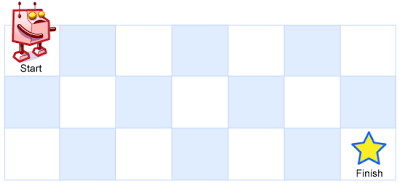

In [ ]:
m = 3
n = 7

dp = [[0]*n for _ in range(m)]
for jj in range(n):
    dp[0][jj] = 1
for ii in range(m):
    dp[ii][0] = 1
for ii in range(1,m):
    for jj in range(1,n):
        dp[ii][jj] = dp[ii-1][jj] + dp[ii][jj-1]  # 核心

print(dp[-1][-1])

## [63. 不同路径 II](https://leetcode.cn/problems/unique-paths-ii/)
一个机器人位于一个$m \times n$网格的左上角 （起始点在下图中标记为 “Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish”）。

现在考虑网格中有障碍物。那么从左上角到右下角将会有多少条不同的路径？

网格中的障碍物和空位置分别用$1$和$0$来表示。
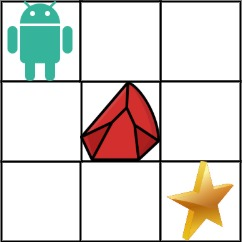

>题解:  
$dp(i,j)$来表示从坐标$(0,0)$到坐标$(i,j)$的路径总数;  
$u(i,j)$表示坐标$(i,j)$是否可行，如果坐标$(i,j)$有障碍物，$u(i,j)=1$，否则$u(i,j)=0$。  
动态规划转移方程:  
$$ dp(i,j) = \begin{cases} \begin{array}{l,l}
dp(i-1,j)+dp(i,j-1), & u(i,j)=0 \\
0, & u(i,j)=1
\end{array} \end{cases} $$

In [ ]:
obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
# obstacleGrid = [[0,1],[0,0]]
# obstacleGrid = [[1]]
# obstacleGrid = [[0,0,0,0,0],[0,0,0,0,1],[0,0,0,1,0],[0,0,1,0,0]]
# obstacleGrid = [[0,1,0]]
# obstacleGrid = [[0],[1],[0]]

num_row = len(obstacleGrid)
num_col = len(obstacleGrid[0])
dp = [[0]*num_col for _ in range(num_row)]
# 第一行
for jj in range(num_col):
    if obstacleGrid[0][jj] == 0:
        dp[0][jj] = 1
    else:
        break
# 第一列
for ii in range(num_row):
    if obstacleGrid[ii][0] == 0:
        dp[ii][0] = 1
    else:
        break
for ii in range(1,num_row):
    for jj in range(1,num_col):
        if obstacleGrid[ii][jj] == 0:                 # 核心
            dp[ii][jj] = dp[ii-1][jj] + dp[ii][jj-1]  # 核心
print(dp[-1][-1])

## [64. 最小路径和](https://leetcode.cn/problems/minimum-path-sum/)
<=> [剑指 Offer II 099. 最小路径之和](https://leetcode.cn/problems/0i0mDW/)  
给定一个包含非负整数的$m \times n$网格$grid$，请找出一条从左上角到右下角的路径，使得路径上的数字总和为最小。

说明：每次只能向下或者向右移动一步。
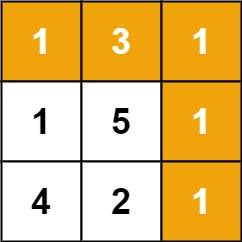

In [ ]:
grid = [[1,3,1],[1,5,1],[4,2,1]]

num_row = len(grid)
num_col = len(grid[0])
dp = [[0]*num_col for _ in range(num_row)]
dp[0][0] = grid[0][0]
# 第一行
for jj in range(1, num_col):
    dp[0][jj] = dp[0][jj-1] + grid[0][jj]
# 第一列
for ii in range(1, num_row):
    dp[ii][0] = dp[ii-1][0] + grid[ii][0]
for ii in range(1,num_row):
    for jj in range(1,num_col):
        dp[ii][jj] = min(dp[ii-1][jj], dp[ii][jj-1]) + grid[ii][jj]  # 核心

print(dp[-1][-1])

## [120. 三角形最小路径和](https://leetcode.cn/problems/triangle/)
<=> [剑指 Offer II 100. 三角形中最小路径之和](https://leetcode.cn/problems/IlPe0q/)  
给定一个三角形$triangle$，找出自顶向下的最小路径和。

每一步只能移动到下一行中相邻的结点上。**相邻的结点**在这里指的是**下标**与**上一层结点下标**相同或者等于**上一层结点下标 + 1**的两个结点。也就是说，如果正位于当前行的下标$i$，那么下一步可以移动到下一行的下标$i$或$i + 1$。


In [ ]:
triangle = [[2],[3,4],[6,5,7],[4,1,8,3]]

dp = [[0]*len(triangle[ii]) for ii in range(len(triangle))]
dp[0][0] = triangle[0][0]
for ii in range(1, len(triangle)):
    for jj in range(len(triangle[ii])):
        if jj == 0:
            dp[ii][jj] = dp[ii-1][jj] + triangle[ii][jj]
        elif jj == len(triangle[ii-1]):
            dp[ii][jj] = dp[ii-1][jj-1] + triangle[ii][jj]
        else:
            dp[ii][jj] = min(dp[ii-1][jj], dp[ii-1][jj-1]) + triangle[ii][jj]

print(min(dp[-1]))

## todo
- 221. 最大正方形
- 1162. 地图分析
- 118 杨辉三角
- 119 杨辉三角 II

# 未分类

## [5. 最长回文子串](https://leetcode.cn/problems/longest-palindromic-substring/)
给你一个字符串$s$，找到$s$中最长的回文子串。

如果字符串的反序与原始字符串相同，则该字符串称为回文字符串。

>题解:   
$P(i,j)$表示字符串$s$的第$i$到$j$个字母组成的串(即$s[i:j]$)是否为回文串:  
$$ dp(i,j) = \begin{cases} \begin{array}{l,l}
true, & 如果子串 S_i \dots S_j 是回文串 \\
false, & otherwise \\
\end{array} \end{cases} $$
状态转移方程: $$P(i,j)=P(i+1,j−1)\ and \ (S_i == S_j)$$  
也就是说, 只有$s[i+1:j−1]$是回文串, 并且$s$的第$i$和$j$个字母相同时, $s[i:j]$才会是回文串。  
边界条件: 
$$ \begin{cases}
P(i,i)=true \\
P(i,i+1)=(S_i == S_j) \\
\end{cases} $$
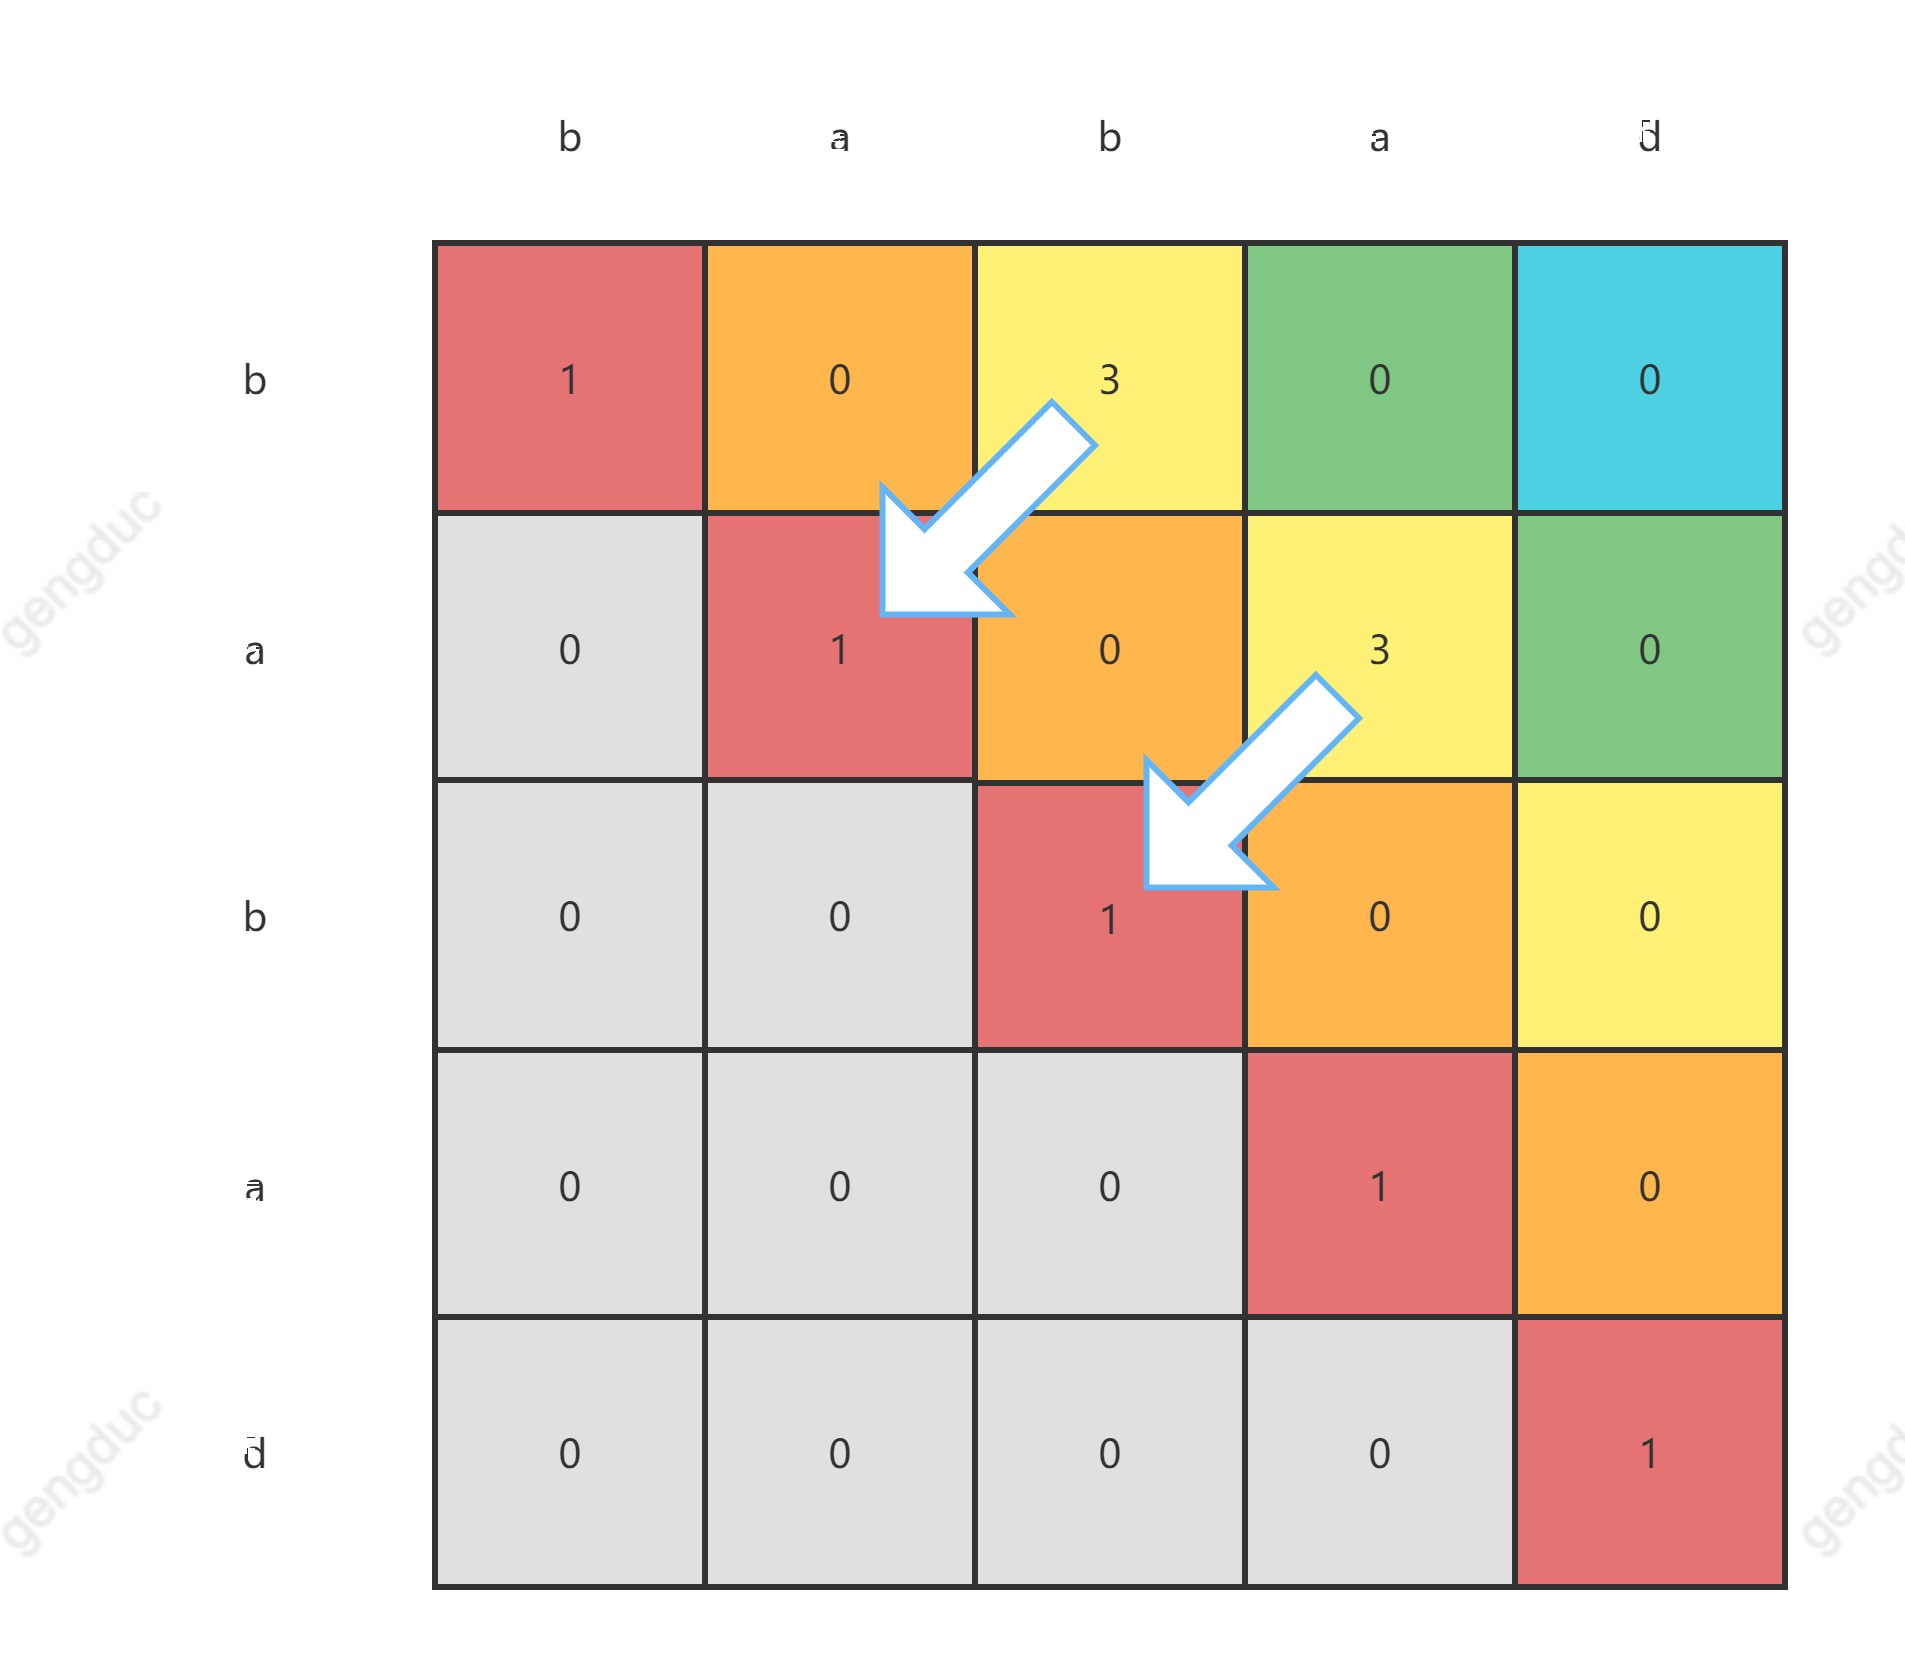

In [ ]:
s = "babad"

count = 1
output = s[0]
dp = [[False]*len(s) for _ in range(len(s))]
for ii in range(len(s)):
    dp[ii][ii] = True
for ii in range(len(s)-2, -1, -1):
    for jj in range(ii+1, len(s)):
        if s[ii] == s[jj]:
            if ii + 1 <= jj - 1:
                dp[ii][jj] = dp[ii + 1][jj - 1]
            else:
                dp[ii][jj] = True
            if dp[ii][jj] and jj + 1 - ii > count:
                count = jj + 1 - ii
                output = s[ii:jj+1]

print(output)

In [ ]:
#include<iostream>
#include<vector>
#include<vector>

std::string s = "babad";

int count = 1;
std::string output = s.substr(0, 1);
auto dp = std::vector<std::vector<bool>> (s.size(), std::vector<bool> (s.size(), false));
for (int ii = 0; ii < s.size(); ii++) {
    dp[ii][ii] = true;
}
for (int ii = s.size() - 2; ii >= 0; ii--) {
    for (int jj = ii + 1; jj < s.size(); jj++) {
        if (s[ii] == s[jj]) {
            if (ii + 1 <= jj - 1) {
                dp[ii][jj] = dp[ii + 1][jj - 1];
            }
            else {
                dp[ii][jj] = true;
            }
            if (dp[ii][jj] && jj + 1 - ii > count) {
                count = jj + 1 - ii;
                output = s.substr(ii, count);
            }
        }
    }
}

std::cout << output << std::endl;

## [97. 交错字符串](https://leetcode.cn/problems/interleaving-string/)
<=> [剑指 Offer II 096. 字符串交织](https://leetcode.cn/problems/IY6buf/)

todo: https://leetcode.cn/problems/interleaving-string/solution/dong-tai-gui-hua-zhu-xing-jie-shi-python3-by-zhu-3/

给定三个字符串 s1、s2、s3，请判断 s3 能不能由 s1 和 s2 交织（交错） 组成。

两个字符串 s 和 t 交织 的定义与过程如下，其中每个字符串都会被分割成若干 非空 子字符串：

- s = s1 + s2 + ... + sn
- t = t1 + t2 + ... + tm
- |n - m| <= 1
- 交织 是 s1 + t1 + s2 + t2 + s3 + t3 + ... 或者 t1 + s1 + t2 + s2 + t3 + s3 + ...

提示：a + b 意味着字符串 a 和 b 连接。

>题解：  
$dp(i,j)$表示$s_1$的前$i$个元素和$s_2$的前$j$个元素是否能交织组成$s_3$的前$i + j$个元素。  
a)如果$s_1$的第$i$个元素和$s_3$的第$i + j$个元素相等，那么$s_1$的前$i$个元素和$s_2$的前$j$个元素是否能交织组成$s_3$的前$i + j$个元素  
取决于$s_1$的前$i - 1$个元素和$s_2$的前$j$个元素是否能交织组成$s_3$的前$i + j - 1$个元素，  
即$dp(i, j)$取决于$dp(i - 1, j)$，在此情况下<font color="red">如果$dp(i - 1, j)$为真，则$dp(i, j)$也为真。</font> Why?  
b)如果$s_2$的第$j$个元素和$s_3$的第$i + j$个元素相等并且$dp(i, j - 1)$为真，则$dp(i, j)$也为真。  
动态规划转移方程: $$dp(i,j)=[dp(i−1,j)\ and\ s_1(i−1)=s_3(i + j - 1)]\ or\ [dp(i,j−1)\ and\ s_2(j−1)=s_3(i + j - 1)]$$
边界条件: $$dp(0,0) = True$$

In [ ]:
s1 = "aabcc"
s2 = "dbbca"
s3 = "aadbbcbcac"

if len(s1) + len(s2) == len(s3):
    dp = [[False]*(len(s2)+1) for _ in range(len(s1)+1)]
    dp[0][0] = True
    for ii in range(1,len(s1)+1):
        dp[ii][0] = s1[0:ii] == s3[0:ii]
    for jj in range(1,len(s2)+1):
        dp[0][jj] = s2[0:jj] == s3[0:jj]
    for ii in range(1,len(s1)+1):
        for jj in range(1,len(s2)+1):
            dp[ii][jj] = (dp[ii-1][jj] and s1[ii-1] == s3[ii+jj-1]) or (dp[ii][jj-1] and s2[jj-1] == s3[ii+jj-1])
    print(dp[-1][-1])
else:
    print(False)

## todo: [583. 两个字符串的删除操作](https://leetcode-cn.com/problems/delete-operation-for-two-strings/)

$dp[i][j]$ 表示 $word_1[0:i]$ 和 $word_2[0:j]$ 的最长公共子序列的长度  
$word_1[0:i]$ 表示 $word_1$ 长度为 $i$ 的前缀，$word_2[0:j]$ 表示 $word_2$ 长度为 $j$ 的前缀
$ dp[i][j] = \begin{cases} dp[i-1][j-1]+1, & word_1[i] = word_2[j] \\ max( dp[i-1][j], dp[i][j-1] ), & word_1[i] \neq word_2[j]\end{cases}$

example:  
$word_1$ = "park", $word_2$ = "spake"  
$ \begin{matrix}dp & & 0 & & 1 & & 2 & & 3 & & 4\\ & & s & & p & & a & & k & & a\\ 0 & p & 0 & & 1 & & 1 & & 1 & & 1 \\ & & & & \downarrow & \searrow & & & \downarrow & & \downarrow \\ 1 & a & 0 & \rightarrow & 1 & & 2 & \rightarrow & 2 & \rightarrow & 2 \\ & & & & \downarrow & & \downarrow & & \downarrow & & \downarrow \\ 2 & r & 0 & \rightarrow & 1 & \rightarrow & 2 & \rightarrow & 2 & \rightarrow & 2 \\ & & & & \downarrow & & \downarrow & \searrow & & & \downarrow \\ 3 & k & 0 & \rightarrow & 1 & \rightarrow & 2 & & 3 & \rightarrow & 3 \end{matrix} $

第1列表示 $word_1[0:i]$ 与 $word_2[0]$ 的最长公共子序列的长度,最大值为1  
第1行表示 $word_2[0:j]$ 与 $word_1[0]$ 的最长公共子序列的长度,最大值为1

In [1]:
# 583.两个字符串的删除操作 python
# word1 = "sea"
# word2 = "eat"
word1 = "park"
word2 = "spake"


dp = [[0]*len(word2) for _ in range(len(word1))]
if word1[0] == word2[0]:
    dp[0][0] = 1
for ii in range(1,len(word1)):
    if word1[ii] == word2[0]:
        dp[ii][0] = max(dp[ii-1][0],1)
    else:
        dp[ii][0] = dp[ii-1][0]
for jj in range(1,len(word2)):
    if word2[jj] == word1[0]:
        dp[0][jj] = max(dp[0][jj-1],1)
    else:
        dp[0][jj] = dp[0][jj-1]
for ii in range(1,len(word1)):
    for jj in range(1,len(word2)):
        if word1[ii] == word2[jj]:
            dp[ii][jj] = dp[ii-1][jj-1]+1
        else:
            dp[ii][jj] = max(dp[ii][jj-1],dp[ii-1][jj])

print(len(word1)+len(word2)-2*dp[-1][-1])

3


In [ ]:
// 583.两个字符串的删除操作 cpp

#include <iostream>
#include <vector>
#include <string>
using namespace std;

string word1 = "park";
string word2 = "spake";

vector<vector<int>> dp;
for (size_t ii = 0; ii < word1.size(); ii++)
{
    vector<int> temp;
    for (size_t jj = 0; jj < word2.size(); jj++)
    {
        temp.emplace_back(0);
    }
    dp.emplace_back(temp);
}
if (word1[0] == word2[0])
{
    dp[0][0] = 1;
}
for (size_t ii = 1; ii < word1.size(); ii++)
{
    if (word1[ii] == word2[0])
    {
        dp[ii][0] = 1;
    }
    else
    {
        dp[ii][0] = dp[ii - 1][0];
    }
}
for (size_t jj = 1; jj < word2.size(); jj++)
{
    if (word2[jj] == word1[0])
    {
        dp[0][jj] = 1;
    }
    else
    {
        dp[0][jj] = dp[0][jj - 1];
    }
}
for (size_t ii = 1; ii < word1.size(); ii++)
{
    for (size_t jj = 1; jj < word2.size(); jj++)
    {
        if (word1[ii] == word2[jj])
        {
            dp[ii][jj] = dp[ii - 1][jj - 1] + 1;
        }
        else
        {
            dp[ii][jj] = max(dp[ii - 1][jj], dp[ii][jj - 1]);
        }
    }
}

cout << word1.size() + word2.size() - 2*dp[word1.size() - 1][word2.size() - 1] << endl;

## todo: [1143. 最长公共子序列](https://leetcode-cn.com/problems/longest-common-subsequence/)

In [ ]:
# 1143.最长公共子序列 python
text1 = "park"
text2 = "spake" 

dp = [[0]*len(text2) for _ in range(len(text1))]
if text1[0] == text2[0]:
    dp[0][0] = 1
for ii in range(1,len(text1)):
    if text1[ii] == text2[0]:
        dp[ii][0] = 1
    else:
        dp[ii][0] = dp[ii-1][0]
for jj in range(1,len(text2)):
    if text2[jj] == text1[0]:
        dp[0][jj] = 1
    else:
        dp[0][jj] = dp[0][jj-1]
for ii in range(1,len(text1)):
    for jj in range(1,len(text2)):
        if text1[ii] == text2[jj]:
            dp[ii][jj] = dp[ii-1][jj-1]+1
        else:
            dp[ii][jj] = max(dp[ii][jj-1],dp[ii-1][jj])

print(dp[-1][-1])

In [ ]:
// 1143.最长公共子序列 cpp
#include <iostream>
#include <vector>
#include <string>
using namespace std;

string text1 = "park";
string text2 = "spake";

vector<vector<int>> dp;
for (size_t ii = 0; ii < text1.size(); ii++)
{
    vector<int> temp;
    for (size_t jj = 0; jj < text2.size(); jj++)
    {
        temp.emplace_back(0);
    }
    dp.emplace_back(temp);
}
if (text1[0] == text2[0])
{
    dp[0][0] = 1;
}
for (size_t ii = 1; ii < text1.size(); ii++)
{
    if (text1[ii] == text2[0])
    {
        dp[ii][0] = 1;
    }
    else
    {
        dp[ii][0] = dp[ii - 1][0];
    }
}
for (size_t jj = 1; jj < text2.size(); jj++)
{
    if (text2[jj] == text1[0])
    {
        dp[0][jj] = 1;
    }
    else
    {
        dp[0][jj] = dp[0][jj-1];
    }
}
for (size_t ii = 1; ii < text1.size(); ii++)
{
    for (size_t jj = 1; jj < text2.size(); jj++)
    {
        if (text1[ii] == text2[jj])
        {
            dp[ii][jj] = dp[ii - 1][jj - 1] + 1;
        }
        else
        {
            dp[ii][jj] = max(dp[ii - 1][jj], dp[ii][jj - 1]);
        }
    }
}

cout << dp[text1.size() - 1][text2.size() - 1] << endl;